===== 거리 행렬 계산 =====
거리 행렬:
 [[0.         0.53851648 0.50990195 0.64807407 0.14142136]
 [0.53851648 0.         0.3        0.33166248 0.60827625]
 [0.50990195 0.3        0.         0.24494897 0.50990195]
 [0.64807407 0.33166248 0.24494897 0.         0.64807407]
 [0.14142136 0.60827625 0.50990195 0.64807407 0.        ]]

===== K-means 군집 분석 =====
군집 레이블 (일부): [1 1 1 1 1 1 1 1 1 1]
군집 중심:
 [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]

===== 계층적 군집 분석 =====
계층적 군집 레이블 (일부): [1 1 1 1 1 1 1 1 1 1]


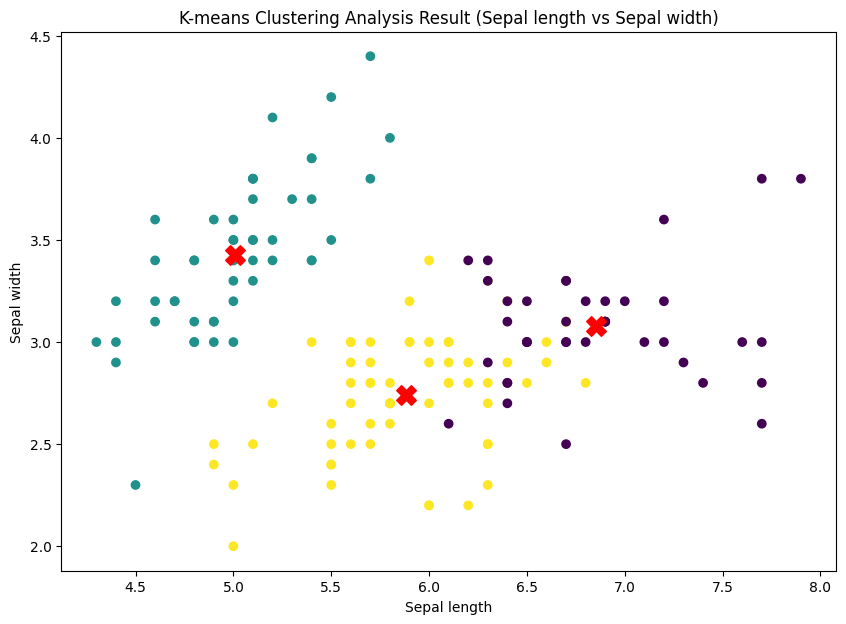

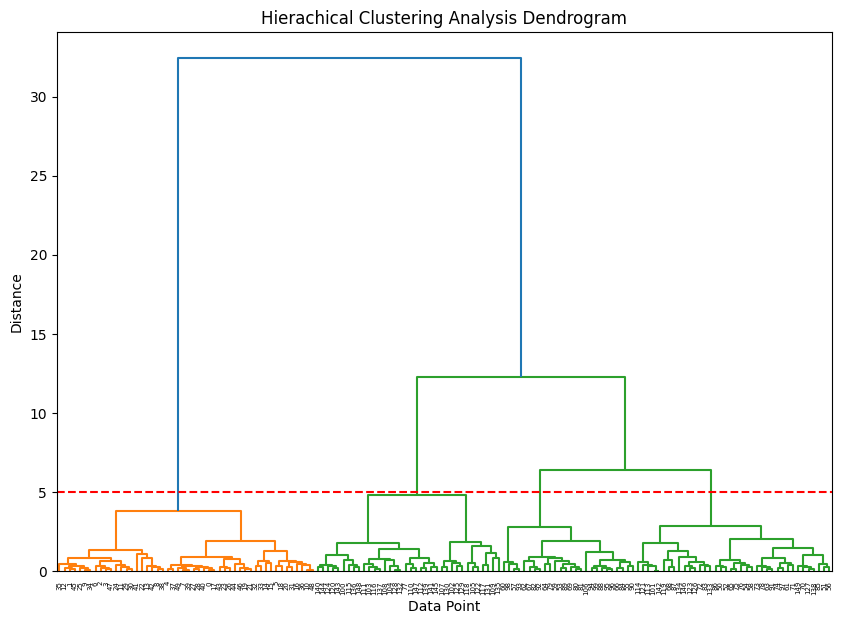

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import load_iris
import pandas as pd
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import pdist, squareform

# 1. 거리 행렬(Distance Matrix) 개념 구현
def create_distance_matrix(data):
    """
    데이터 포인트 간의 거리 행렬을 계산합니다.
    이는 군집 분석의 기초가 되는 개념입니다.
    """
    # 유클리드 거리 계산
    distances = pdist(data, metric='euclidean')
    # 정방형 거리 행렬로 변환
    distance_matrix = squareform(distances)
    return distance_matrix

# 2. K-means 군집 분석 구현
def kmeans_clustering(data, n_clusters=3):
    """
    K-means 알고리즘을 사용한 군집 분석
    K개의 평균(means)을 중심으로 데이터를 군집화합니다.
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    return labels, centroids

# 3. 계층적 군집 분석 및 Dendrogram 시각화
def hierarchical_clustering(data, n_clusters=3):
    """
    계층적 군집 분석 구현 및 Dendrogram 시각화
    데이터 포인트 간의 거리를 기반으로 계층적으로 군집을 형성합니다.
    """
    # Ward 연결법을 사용한 계층적 군집화
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = model.fit_predict(data)
    
    # Dendrogram 시각화
    plt.figure(figsize=(10, 7))
    dend = shc.dendrogram(shc.linkage(data, method='ward'))
    plt.title('Hierachical Clustering Analysis Dendrogram')
    plt.xlabel('Data Point')
    plt.ylabel('Distance')
    plt.axhline(y=5, color='r', linestyle='--')  # 군집 구분선
    
    return labels

# 4. 메인 코드: Iris 데이터셋 사용 예제
def main():
    # Iris 데이터 로드
    iris = load_iris()
    iris_data = iris.data
    
    print("===== 거리 행렬 계산 =====")
    # 처음 5개 데이터 포인트의 거리 행렬
    distance_matrix = create_distance_matrix(iris_data[:5])
    print("거리 행렬:\n", distance_matrix)
    
    print("\n===== K-means 군집 분석 =====")
    labels, centroids = kmeans_clustering(iris_data, n_clusters=3)
    print("군집 레이블 (일부):", labels[:10])
    print("군집 중심:\n", centroids)
    
    # K-means 결과 시각화
    plt.figure(figsize=(10, 7))
    plt.scatter(iris_data[:, 0], iris_data[:, 1], c=labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red')
    plt.title('K-means Clustering Analysis Result (Sepal length vs Sepal width)')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    
    print("\n===== 계층적 군집 분석 =====")
    hier_labels = hierarchical_clustering(iris_data, n_clusters=3)
    print("계층적 군집 레이블 (일부):", hier_labels[:10])
    
    plt.show()

if __name__ == "__main__":
    main()
